In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import torch
import pytorch_lightning as pl

from neural_processes.data import gaussian_process as gp
from neural_processes import base, decoders, encoders, models

plt.style.use("seaborn")

In [2]:
def plot_test(net, random_kernel_parameters, with_samples=True):
    test = gp.torch.CurveGenerator(
        batch_size=1,
        max_num_context=20,
        random_kernel_parameters=random_kernel_parameters,
        testing=True
    ).generate_batch()
    
    context_x, context_y, target_x, target_y = test

    num_samples = 100
    
    mean_mu = net.forward(context_x, context_y, target_x, use_mean_latent=True)
    sample_mus = [
        net.forward(context_x, context_y, target_x, use_mean_latent=False)
        for _ in range(num_samples)
    ]
    # If we're outputting sigma and mu, just take mu
    if len(mean_mu) == 2:
        mean_mu, _ = mean_mu
        sample_mus = [sample[0] for sample in sample_mus]


    mean_mu = mean_mu.squeeze().detach()
    context_x = context_x.squeeze()
    context_y = context_y.squeeze()
    target_x = target_x.squeeze()
    target_y = target_y.squeeze()

    plt.scatter(target_x, target_y, s=10, color="grey", label="target", alpha=0.5)
    plt.scatter(context_x, context_y, s=20, color="tab:red", label="context")

    plt.plot(target_x, mean_mu, linestyle="--", color="tab:blue", label="output mean")
    if with_samples:
        for mu in sample_mus:
            plt.plot(target_x, mu.squeeze().detach(), linestyle="--", color="tab:blue", alpha=0.1)
    plt.plot(target_x, mean_mu, linestyle="--", color="tab:blue", label="output mean")
    plt.legend()
    plt.show()


# Fixed kernel parameters

In [3]:
encoder_mlp = base.MLP(input_size=2, output_sizes=[64, 64, 64])

latent_dim = 64
latent_params_mlp = base.MLP(input_size=64, output_sizes=[64, 2 * latent_dim])


encoder = encoders.Latent(encoder_mlp, latent_params_mlp)
decoder = decoders.Decoder(input_size=65, output_sizes=[64, 64, 1])

train_loader = gp.torch.CurveGenerator(
    batch_size=16,
    max_num_context=20, 
    random_kernel_parameters=False,
    testing=False,
)

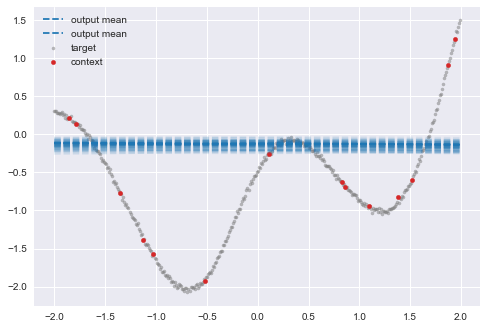

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


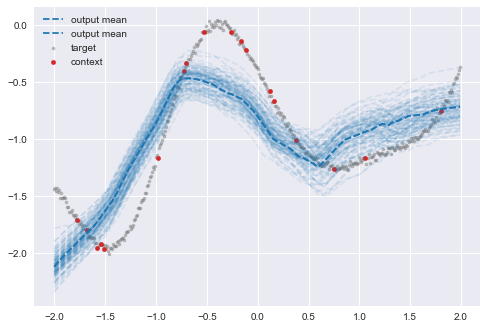

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


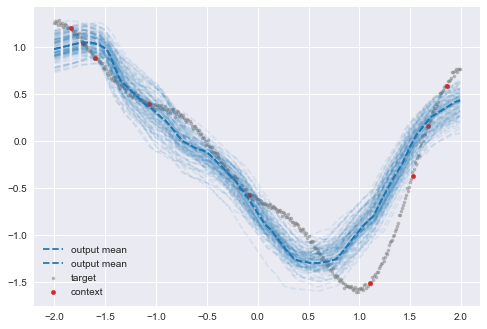

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


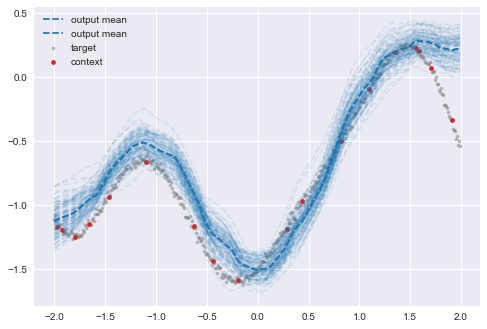

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


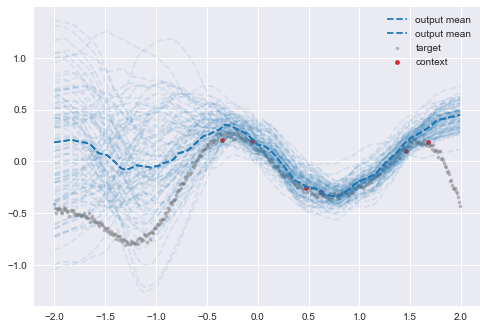

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


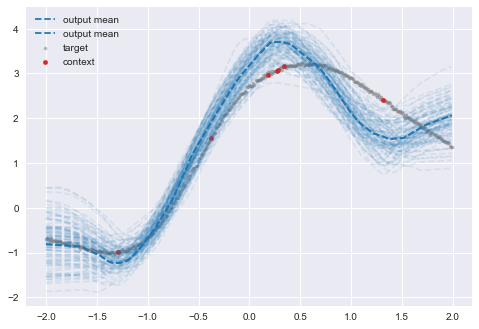

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


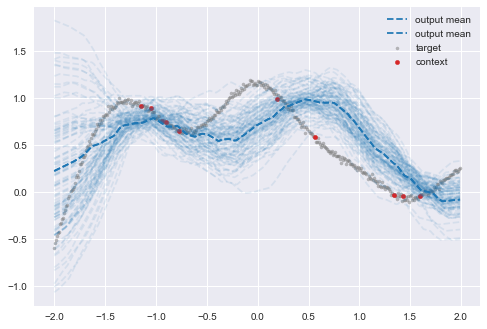

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


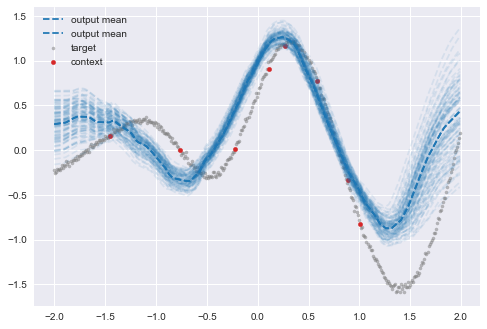

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


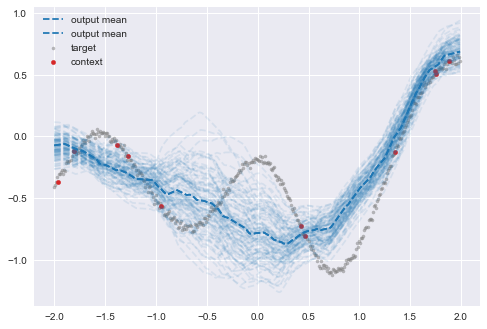

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


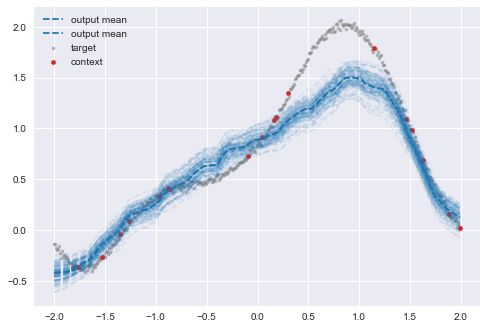

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


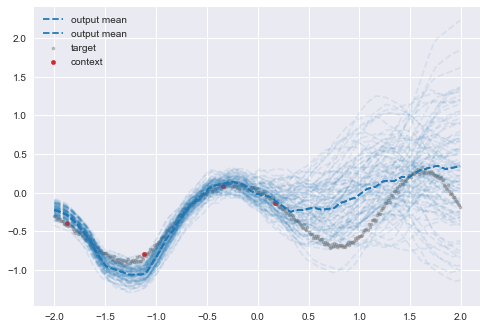

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


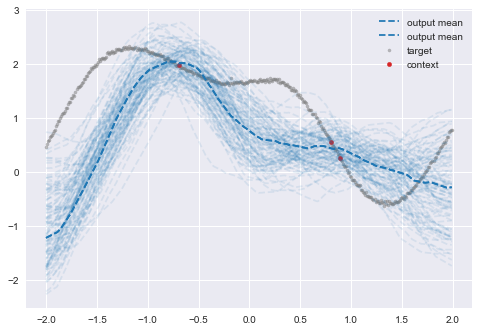

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


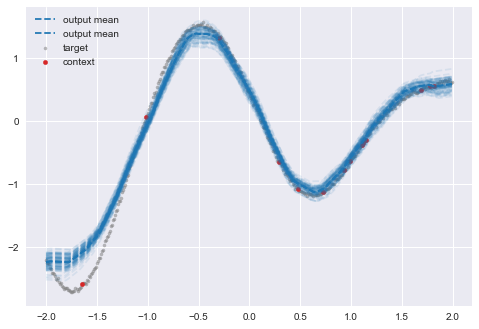

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 20 K  
1  | encoder.encoder               | MLP        | 8 K   
2  | encoder.encoder.initial       | Linear     | 192   
3  | encoder.encoder.hidden        | ModuleList | 4 K   
4  | encoder.encoder.hidden.0      | Linear     | 4 K   
5  | encoder.encoder.final         | Linear     | 4 K   
6  | encoder.latent_params         | MLP        | 12 K  
7  | encoder.latent_params.initial | Linear     | 4 K   
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 8 K   
10 | decoder                       | Decoder    | 8 K   
11 | decoder.mlp                   | MLP        | 8 K   
12 | decoder.mlp.initial           | Linear     | 4 K   
13 | decoder.mlp.hidden            | ModuleList | 4 

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


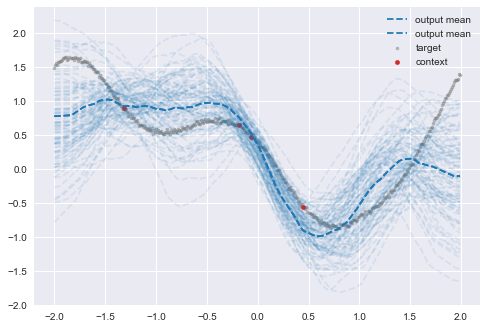

In [4]:
net_1 = models.NP(
    encoder=encoder, decoder=decoder, train_loader=train_loader, fixed_sigma=0.02
)
plot_test(net_1, random_kernel_parameters=False)

for _ in range(13):
    trainer = pl.Trainer(max_steps=10000)
    trainer.fit(net_1)

    plot_test(net_1, random_kernel_parameters=False)

In [5]:
torch.save(net_1.state_dict(), "train_np__net_1.weights")

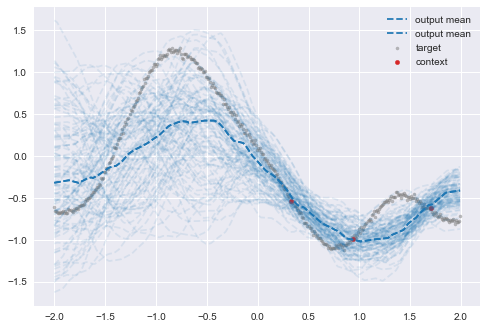

In [6]:
plot_test(net_1, random_kernel_parameters=False)

# Randomized kernel parameters

In [7]:
encoder_mlp_bigger = base.MLP(input_size=2, output_sizes=[128, 128, 128])

latent_dim = 128
latent_params_mlp_bigger = base.MLP(input_size=128, output_sizes=[128, 2 * latent_dim])


encoder_bigger = encoders.Latent(encoder_mlp_bigger, latent_params_mlp_bigger)
decoder_bigger = decoders.Decoder(input_size=129, output_sizes=[128, 128, 1])

train_loader_randomized = gp.torch.CurveGenerator(
    batch_size=16,
    max_num_context=20, 
    random_kernel_parameters=True,
    testing=False,
)

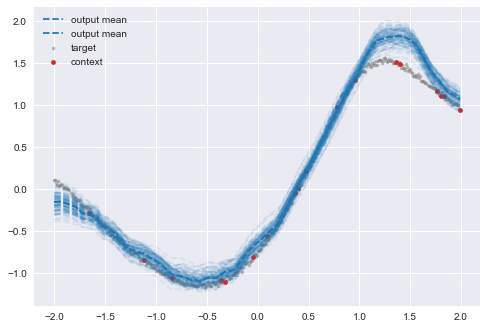

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


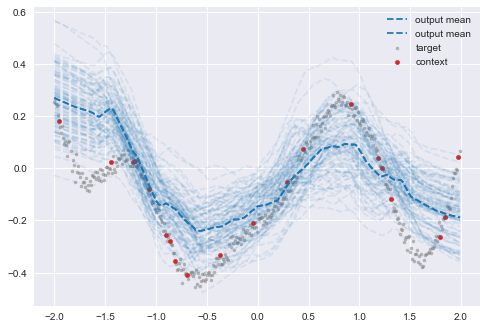

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


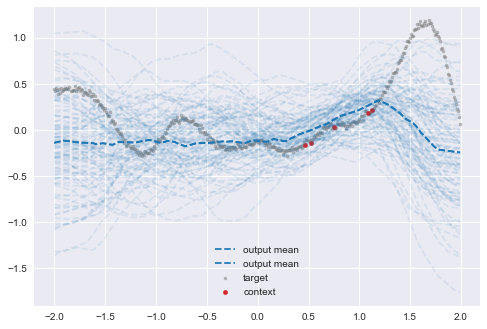

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


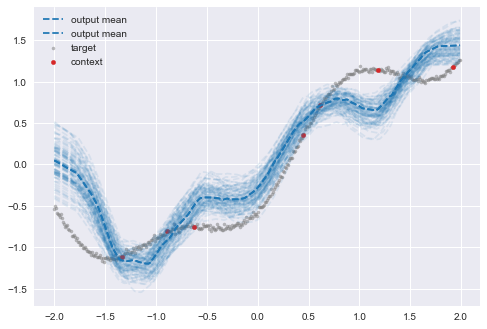

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


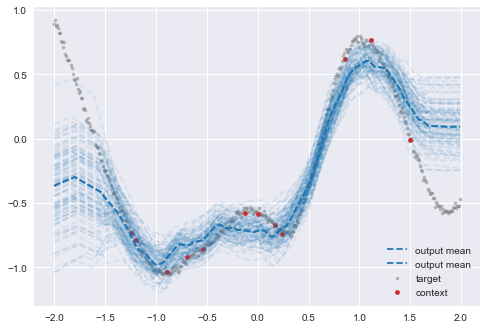

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


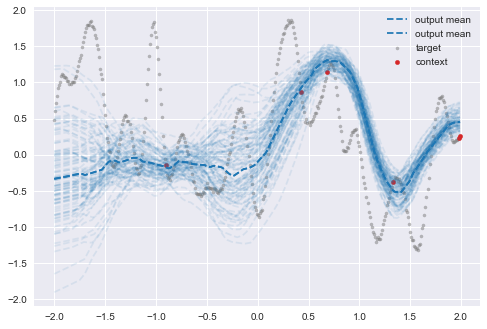

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


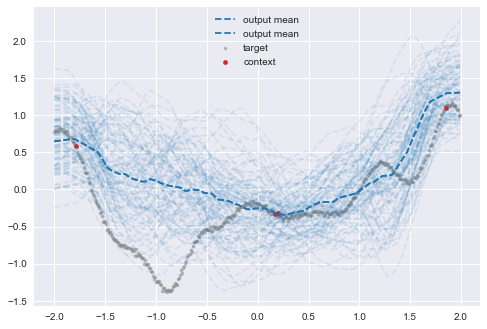

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


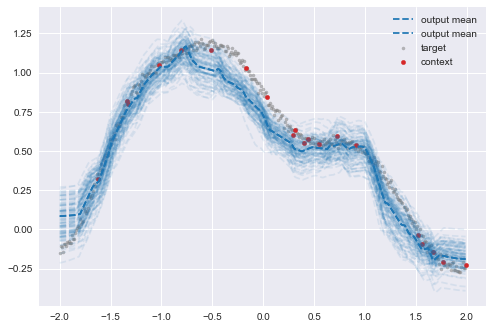

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


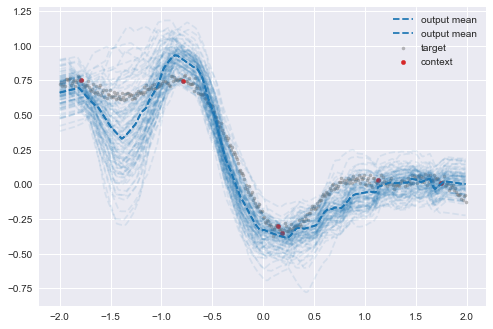

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


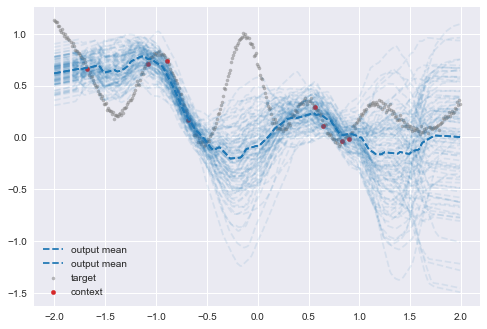

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


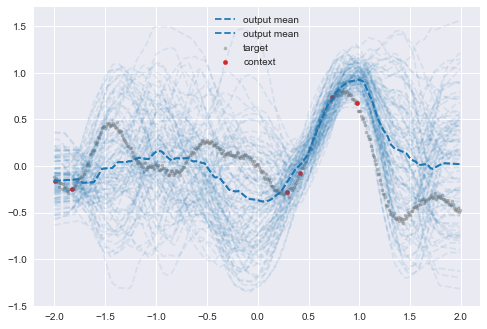

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


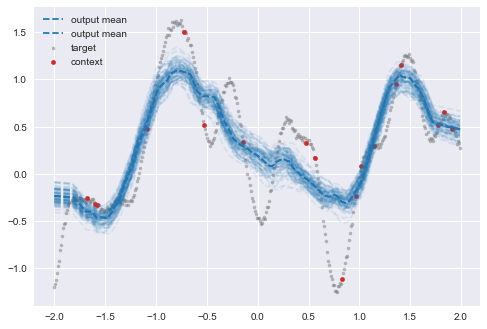

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


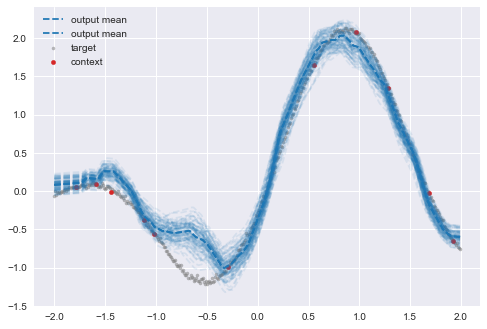

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


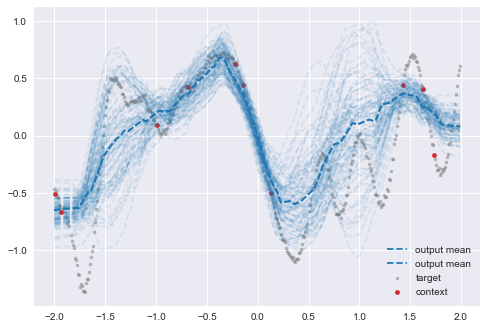

In [8]:
net_random = models.NP(
    encoder=encoder_bigger, decoder=decoder_bigger, train_loader=train_loader_randomized, fixed_sigma=0.02
)
plot_test(net_1, random_kernel_parameters=True)

for _ in range(13):
    trainer = pl.Trainer(max_steps=10000)
    trainer.fit(net_random)

    plot_test(net_random, random_kernel_parameters=True)

In [9]:
torch.save(net_random.state_dict(), "train_np__net_2.weights")

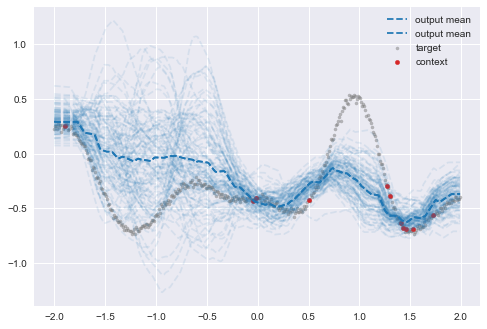

In [10]:
plot_test(net_random, random_kernel_parameters=True)

#  Randomized kernel parameters and inferred sigma

In [11]:
latent_dim = 128
encoder_infer_sigma = encoders.Latent(
    encoder_net=base.MLP(input_size=2, output_sizes=[128, 128, 128]),
    latent_params_net=base.MLP(input_size=128, output_sizes=[128, 2 * latent_dim]),
)
                             
decoder_infer_sigma = decoders.Decoder(input_size=129, output_sizes=[128, 128, 2])

train_loader_randomized = gp.torch.CurveGenerator(
    batch_size=16,
    max_num_context=20, 
    random_kernel_parameters=True,
    testing=False,
)

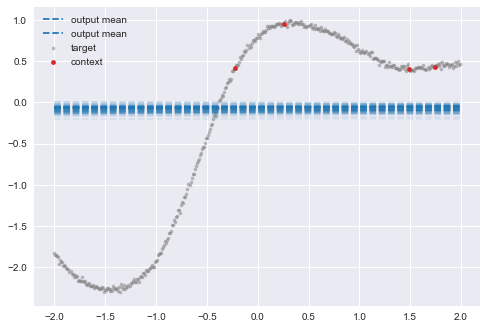

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


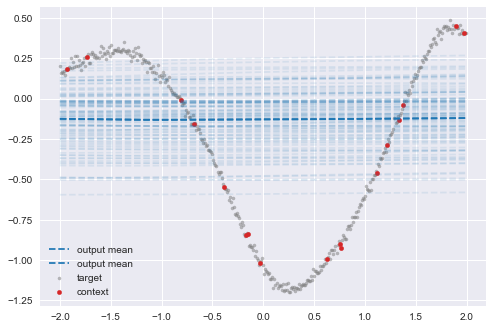

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


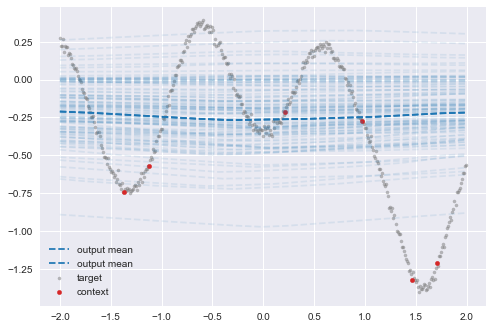

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


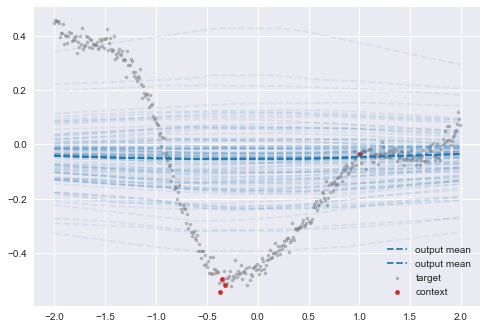

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


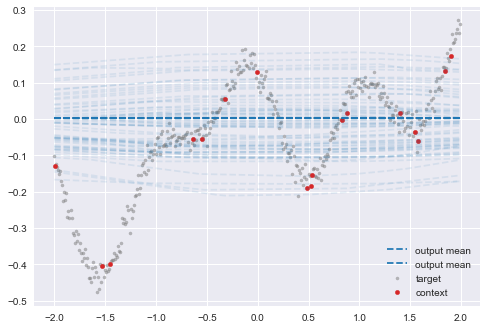

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


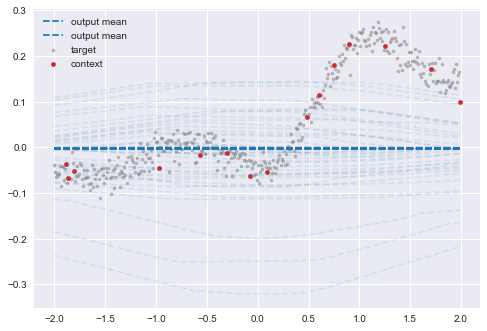

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


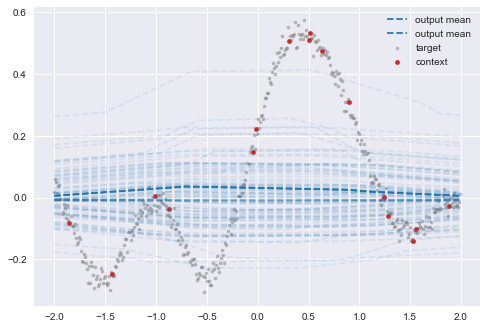

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


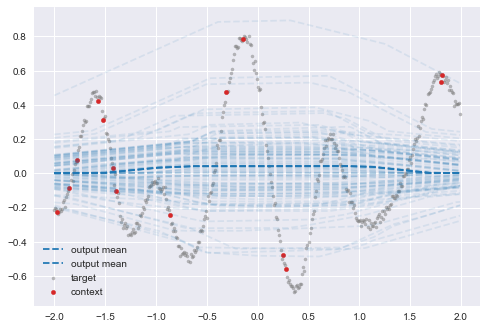

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


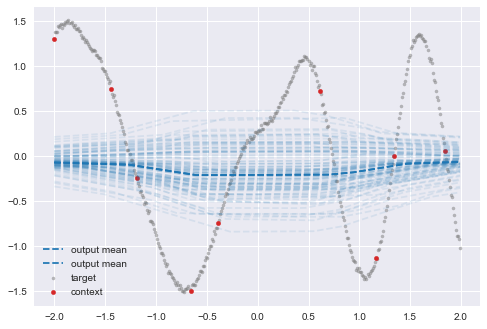

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


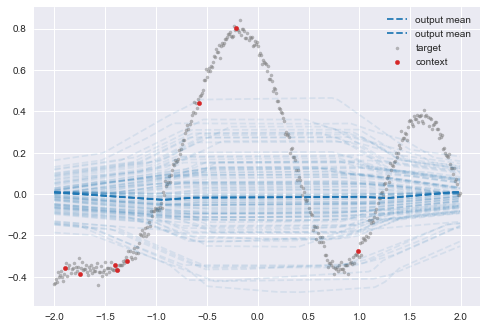

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


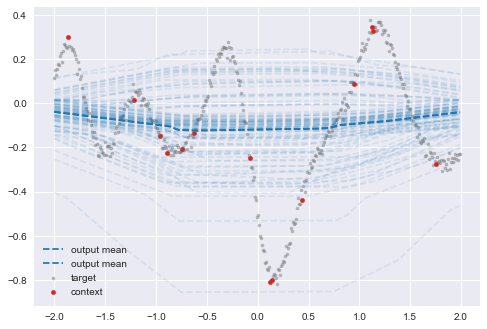

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


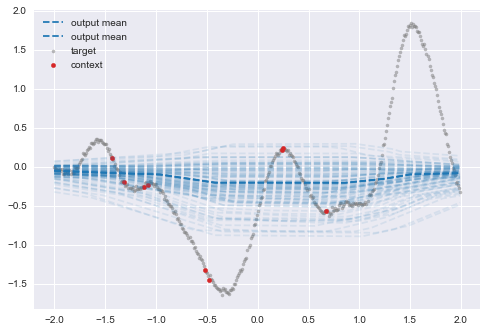

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


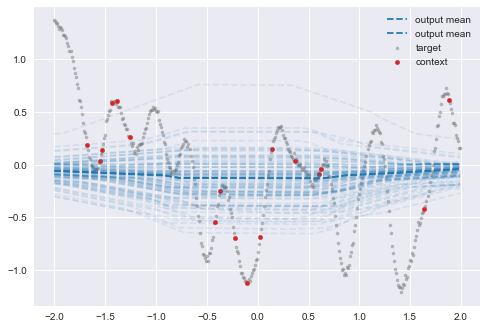

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                          | Type       | Params
---------------------------------------------------------
0  | encoder                       | Latent     | 82 K  
1  | encoder.encoder               | MLP        | 33 K  
2  | encoder.encoder.initial       | Linear     | 384   
3  | encoder.encoder.hidden        | ModuleList | 16 K  
4  | encoder.encoder.hidden.0      | Linear     | 16 K  
5  | encoder.encoder.final         | Linear     | 16 K  
6  | encoder.latent_params         | MLP        | 49 K  
7  | encoder.latent_params.initial | Linear     | 16 K  
8  | encoder.latent_params.hidden  | ModuleList | 0     
9  | encoder.latent_params.final   | Linear     | 33 K  
10 | decoder                       | Decoder    | 33 K  
11 | decoder.mlp                   | MLP        | 33 K  
12 | decoder.mlp.initial           | Linear     | 16 K  
13 | decoder.mlp.hidden            | ModuleList | 16

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


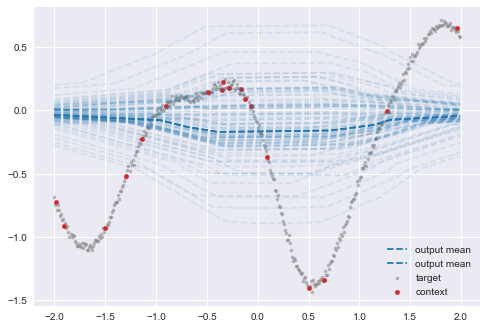

In [12]:
net_infer_sigma = models.NP(
    encoder=encoder_infer_sigma, decoder=decoder_infer_sigma, train_loader=train_loader_randomized
)
plot_test(net_infer_sigma, random_kernel_parameters=True)

for _ in range(13):
    trainer = pl.Trainer(max_steps=10000)
    trainer.fit(net_infer_sigma)

    plot_test(net_infer_sigma, random_kernel_parameters=True)

In [13]:
torch.save(net_infer_sigma.state_dict(), "train_np__net_3.weights")

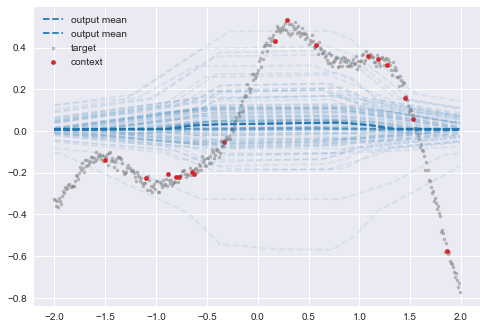

In [14]:
plot_test(net_infer_sigma, random_kernel_parameters=True)

The model doesn't learn when it also outputs sigma. Could try another approach, where we train the network with fixed sigma to learn the encoding, then learn the sigma afterwards.